In [79]:
import re
import numpy as np
import pandas as pd
from statsmodels.tsa.stattools import adfuller
import matplotlib.pyplot as plt
import seaborn as sns


In [52]:
df = pd.read_csv('./data/Bleached Softwood Kraft Pulp Futures Historical Data.csv')

In [59]:
def clean_data(input_df: pd.DataFrame) -> pd.DataFrame:
    df = input_df.copy()
    cols = ['Price', 'Open', 'High', 'Low', 'Vol.', 'Change %']

    for col in cols:
        if col == 'Vol.':
            df[col] = df[col].apply(lambda x: float(re.sub('K', '', x)) * 1000 if x != '-' else 0)
        elif col == 'Change %':
            df[col] = df[col].apply(lambda x: float(re.sub('%', '', x)) / 100)
        else:
            df[col] = df[col].apply(lambda x: float(re.sub(',', '', x)))
    
    return df


In [60]:
df = clean_data(df)

In [62]:
df.head()

,Date,Price,Open,High,Low,Vol.,Change %
0,09/18/2024,5564.0,5580.0,5600.0,5510.0,1150.0,0.0022
1,09/13/2024,5552.0,5532.0,5578.0,5526.0,310.0,0.0029
2,09/12/2024,5536.0,5566.0,5582.0,5510.0,180.0,-0.0018
3,09/11/2024,5546.0,5602.0,5624.0,5502.0,2180.0,-0.0142
4,09/10/2024,5626.0,5616.0,5670.0,5612.0,360.0,-0.0004


## Augmented Dickey-Fuller(ADF) test

Augmented Dickey-Fuller (ADF) test is a type of statistical test called a unit root test. Unit roots are a cause for non-stationarity.

Null Hypothesis (H0): Time series has a unit root. (Time series is not stationary).

Alternate Hypothesis (H1): Time series has no unit root (Time series is stationary).

If the null hypothesis can be rejected, we can conclude that the time series is stationary.

There are two ways to rejects the null hypothesis:

On the one hand, the null hypothesis can be rejected if the p-value is below a set significance level. The defaults significance level is 5%

**p-value > significance level (default: 0.05)**: Fail to reject the null hypothesis (H0), the data has a unit root and is non-stationary.
**p-value <= significance level (default: 0.05)**: Reject the null hypothesis (H0), the data does not have a unit root and is stationary.
On the other hand, the null hypothesis can be rejects if the test statistic is less than the critical value.

**ADF statistic > critical value**: Fail to reject the null hypothesis (H0), the data has a unit root and is non-stationary.
**ADF statistic < critical value**: Reject the null hypothesis (H0), the data does not have a unit root and is stationary.

In [63]:
result = adfuller(df.Price.values)

In [64]:
result

(np.float64(-1.3316201882856957),
 np.float64(0.6145847862591056),
 2,
 1140,
 {'1%': np.float64(-3.4360991979671205),
  '5%': np.float64(-2.864078635828568),
  '10%': np.float64(-2.568121635118498)},
 np.float64(12513.816884947031))

In [65]:
adf_stat = result[0]
p_val = result[1]
crit_val_1 = result[4]['1%']
crit_val_5 = result[4]['5%']
crit_val_10 = result[4]['10%']

In [66]:
adf_stat

np.float64(-1.3316201882856957)

In [67]:
p_val

np.float64(0.6145847862591056)

- the data has a unit root and is non-stationary.

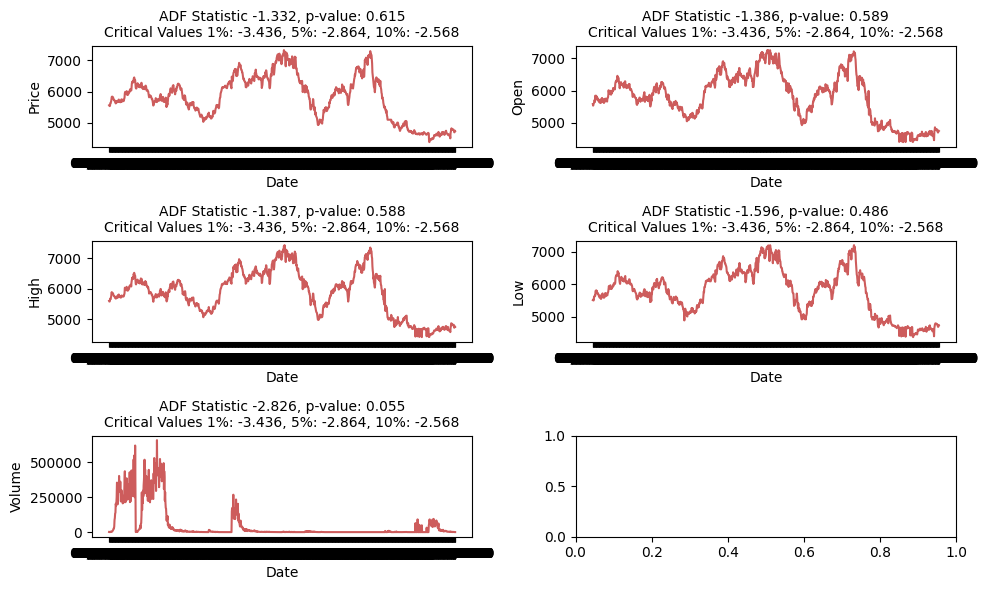

In [85]:
def visualize_adfuller_results(series, title, ax):
    result = adfuller(series)
    significance_level = 0.05
    adf_stat = result[0]
    p_val = result[1]
    crit_val_1 = result[4]['1%']
    crit_val_5 = result[4]['5%']
    crit_val_10 = result[4]['10%']

    if (p_val < significance_level) & ((adf_stat < crit_val_1)):
        linecolor = 'forestgreen' 
    elif (p_val < significance_level) & (adf_stat < crit_val_5):
        linecolor = 'gold'
    elif (p_val < significance_level) & (adf_stat < crit_val_10):
        linecolor = 'orange'
    else:
        linecolor = 'indianred'
    
    sns.lineplot(x=df.Date, y=series, ax=ax, color=linecolor)
    ax.set_title(f'ADF Statistic {adf_stat:0.3f}, p-value: {p_val:0.3f}\nCritical Values 1%: {crit_val_1:0.3f}, 5%: {crit_val_5:0.3f}, 10%: {crit_val_10:0.3f}', fontsize=10)
    ax.set_ylabel(ylabel=title, fontsize=10)


fig, ax = plt.subplots(3, 2, figsize=(10, 6))
ax = ax.flatten()

visualize_adfuller_results(df['Price'].values, 'Price', ax[0])
visualize_adfuller_results(df['Open'].values, 'Open', ax[1])
visualize_adfuller_results(df['High'].values, 'High', ax[2])
visualize_adfuller_results(df['Low'].values, 'Low', ax[3])
visualize_adfuller_results(df['Vol.'].values, 'Volume', ax[4])

8
plt.tight_layout()
plt.show()


In [89]:
df['Price_log'] = np.log(df['Price'])

In [90]:
def visualize_adfuller_results(series, title, df):
    result = adfuller(series)
    significance_level = 0.05
    adf_stat = result[0]
    p_val = result[1]
    crit_val_1 = result[4]['1%']
    crit_val_5 = result[4]['5%']
    crit_val_10 = result[4]['10%']

    if (p_val < significance_level) & ((adf_stat < crit_val_1)):
        linecolor = 'forestgreen' 
    elif (p_val < significance_level) & (adf_stat < crit_val_5):
        linecolor = 'gold'
    elif (p_val < significance_level) & (adf_stat < crit_val_10):
        linecolor = 'orange'
    else:
        linecolor = 'indianred'
    
    # Create a single plot
    plt.figure(figsize=(10, 6))
    sns.lineplot(x=df['Date'], y=series, color=linecolor)
    plt.title(f'ADF Statistic {adf_stat:0.3f}, p-value: {p_val:0.3f}\n'
              f'Critical Values 1%: {crit_val_1:0.3f}, 5%: {crit_val_5:0.3f}, 10%: {crit_val_10:0.3f}',
              fontsize=12)
    plt.ylabel(title, fontsize=10)
    plt.xlabel('Date', fontsize=10)
    plt.grid(True)
    plt.show()

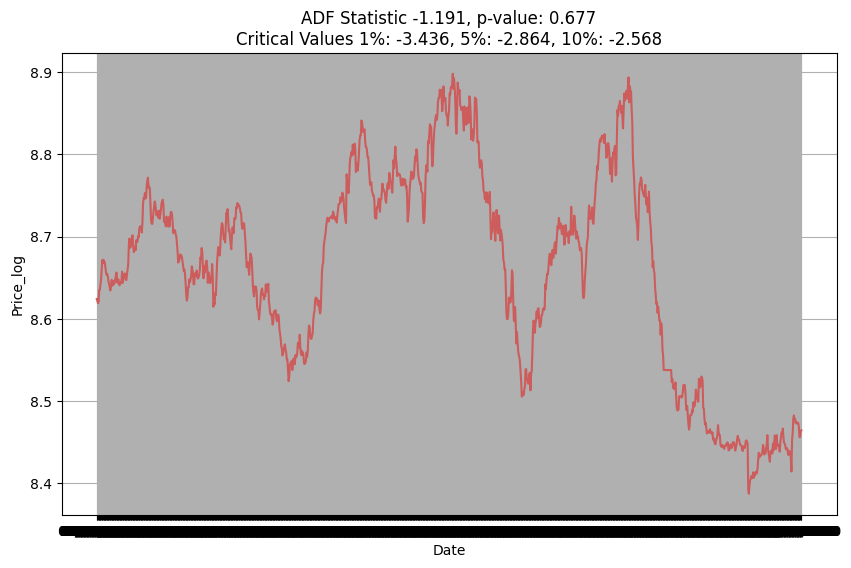

In [92]:
visualize_adfuller_results(df['Price_log'], 'Price_log', df)

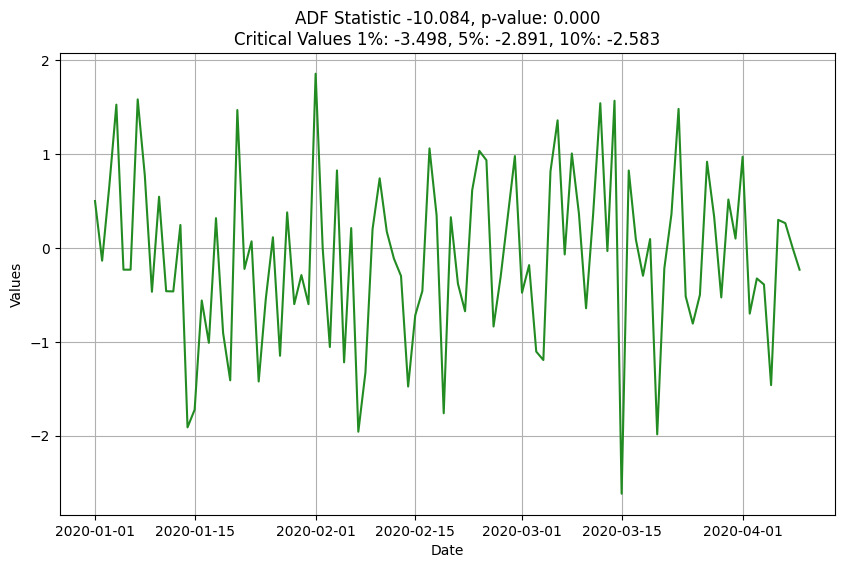

In [95]:
# Generate a stationary time series (random noise)
np.random.seed(42)  # For reproducibility
n = 100
stationary_series = np.random.normal(loc=0, scale=1, size=n)  # Mean = 0, Std = 1

# Create a DataFrame with a Date index
dates = pd.date_range(start='2020-01-01', periods=n, freq='D')
df_stationary = pd.DataFrame({'Date': dates, 'Values': stationary_series})

visualize_adfuller_results(df_stationary['Values'], 'Values', df_stationary)